In [1]:
import pandas as pd
import joypy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly_express as px
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns
import missingno as msno
from datetime import datetime
from matplotlib import cm
from sklearn.feature_selection import SelectKBest, chi2
from feature_engine.missing_data_imputers import RandomSampleImputer
import scipy.stats as ss
import calendar
import scipy.stats as stats

In [2]:
df=pd.read_csv('clean.csv')
del df['Unnamed: 0']

In [3]:
df['Year']

0        1902
1        1902
2        1902
3        1902
4        1902
         ... 
43094    2019
43095    2019
43096    2019
43097    2019
43098    2019
Name: Year, Length: 43099, dtype: int64

In [4]:
df.head()

,24-hour average temperature,Sunshine duration,Year,Month
0,8.7,2.3,1902,1
1,8.9,0.1,1902,1
2,7.6,1.3,1902,1
3,8.6,0.0,1902,1
4,5.8,0.0,1902,1


In [5]:
df['24-hour average temperature'].min(),df['24-hour average temperature'].idxmin(),df.iloc[339]

(-9.0,
 339,
 24-hour average temperature      -9.0
 Sunshine duration                 6.2
 Year                           1902.0
 Month                            12.0
 Name: 339, dtype: float64)

In [6]:
df['24-hour average temperature'].max(),df['24-hour average temperature'].idxmax(),df.iloc[42576]

(29.0,
 42576,
 24-hour average temperature      29.0
 Sunshine duration                14.3
 Year                           2018.0
 Month                             7.0
 Name: 42576, dtype: float64)

In [7]:
a=df.groupby('Year')['Sunshine duration'].sum()
b=df.groupby('Year')['24-hour average temperature'].mean()
con = pd.concat([a, b], axis=1)
con.reset_index(inplace=True)
con

,Year,Sunshine duration,24-hour average temperature
0,1902,1462.2,8.247397
1,1903,1282.6,9.166575
2,1904,1469.5,8.933607
3,1905,1481.1,8.713699
4,1906,1293.9,9.195890
...,...,...,...
113,2015,1843.7,11.115342
114,2016,1803.3,10.920765
115,2017,1657.8,11.181096
116,2018,2096.5,11.796986


In [8]:
con['24-hour average temperature'].min(),con['24-hour average temperature'].idxmin(),con.iloc[15]

(8.131506849315075,
 15,
 Year                           1917.000000
 Sunshine duration              1376.100000
 24-hour average temperature       8.131507
 Name: 15, dtype: float64)

In [9]:
con['24-hour average temperature'].max(),con['24-hour average temperature'].idxmax(),con.iloc[116]

(11.796986301369863,
 116,
 Year                           2018.000000
 Sunshine duration              2096.500000
 24-hour average temperature      11.796986
 Name: 116, dtype: float64)

In [10]:
con['Sunshine duration'].min(),con['Sunshine duration'].idxmin(),con.iloc[10]

(799.6999999999999,
 10,
 Year                           1912.000000
 Sunshine duration               799.700000
 24-hour average temperature       9.196175
 Name: 10, dtype: float64)

In [11]:
con['Sunshine duration'].max(),con['Sunshine duration'].idxmax(),con.iloc[116]

(2096.4999999999995,
 116,
 Year                           2018.000000
 Sunshine duration              2096.500000
 24-hour average temperature      11.796986
 Name: 116, dtype: float64)

In [12]:
con[con['Year']>1980]

,Year,Sunshine duration,24-hour average temperature
79,1981,1216.3,9.550685
80,1982,1554.7,10.249041
81,1983,1445.2,10.107123
82,1984,1281.5,9.400000
83,1985,1386.9,8.618630
84,1986,1468.1,9.173425
85,1987,1207.9,8.963562
86,1988,1246.4,10.395628
87,1989,1710.6,10.948493
88,1990,1404.4,10.665205


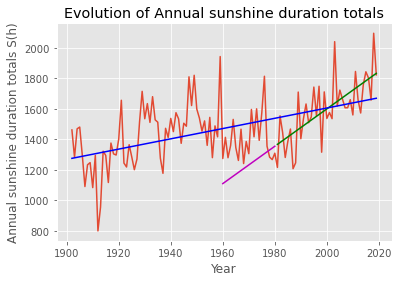

In [13]:
plt.figure(figsize=(6, 4))
#plt.style.use('ggplot')classic
plt.style.use('ggplot')
chart = sns.lineplot(x="Year", y="Sunshine duration", data=con, 
                      markers=True)
chart.set(title='Evolution of Annual sunshine duration totals', ylabel='Annual sunshine duration totals S(h)', xlabel="Year")

z = np.polyfit(con['Year'], con['Sunshine duration'], 1)
p = np.poly1d(z)

zz = np.polyfit(con[con['Year']>1980]['Year'], con[con['Year']>1980]['Sunshine duration'], 1)
pp = np.poly1d(zz)

zzz = np.polyfit(con[(con['Year']>1959)&(con['Year']<1981)]['Year'], con[(con['Year']>1959)&(con['Year']<1981)]['Sunshine duration'], 1)
ppp = np.poly1d(zz)

plt.plot(con[(con['Year']>1959)&(con['Year']<1981)]['Year'], ppp(con[(con['Year']>1959)&(con['Year']<1981)]['Year']), c="m", ls="-")
plt.plot(con[con['Year']>1980]['Year'], pp(con[con['Year']>1980]['Year']), c="g", ls="-")
plt.plot(con['Year'], p(con['Year']), c="b", ls="-")
plt.savefig("suntot.jpeg",bbox_inches="tight",pad_inches = 0,dpi=700)

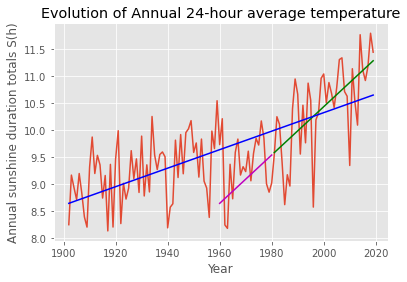

In [122]:
plt.figure(figsize=(6, 4))
#plt.style.use('ggplot')classic
plt.style.use('ggplot')
chart = sns.lineplot(x="Year", y="24-hour average temperature", data=con, 
                      markers=True)
chart.set(title='Evolution of Annual 24-hour average temperature', ylabel='Annual sunshine duration totals S(h)', xlabel="Year")

z = np.polyfit(con['Year'], con['24-hour average temperature'], 1)
p = np.poly1d(z)

zz = np.polyfit(con[con['Year']>1980]['Year'], con[con['Year']>1980]['24-hour average temperature'], 1)
pp = np.poly1d(zz)

zzz = np.polyfit(con[(con['Year']>1959)&(con['Year']<1981)]['Year'], con[(con['Year']>1959)&(con['Year']<1981)]['24-hour average temperature'], 1)
ppp = np.poly1d(zz)

plt.plot(con[(con['Year']>1959)&(con['Year']<1981)]['Year'], ppp(con[(con['Year']>1959)&(con['Year']<1981)]['Year']), c="m", ls="-")
plt.plot(con[con['Year']>1980]['Year'], pp(con[con['Year']>1980]['Year']), c="g", ls="-")
plt.plot(con['Year'], p(con['Year']), c="b", ls="-")
plt.savefig("ttot.jpeg",bbox_inches="tight",pad_inches = 0,dpi=700)

In [111]:
mdf=pd.DataFrame()
for i in range(12):
    mdf[str(i+1)+"s"]=df[df['Month']==i+1].groupby('Year')['Sunshine duration'].sum()

In [112]:
mdf.reset_index(inplace=True)

In [113]:
mdf.head()

,Year,1s,2s,3s,4s,5s,6s,7s,8s,9s,10s,11s,12s
0,1902,24.9,111.0,105.7,149.0,187.4,257.4,194.3,159.8,132.2,43.3,79.1,18.1
1,1903,66.9,42.9,109.9,109.1,208.5,181.6,144.9,144.9,156.6,53.9,22.3,41.1
2,1904,36.0,56.3,69.8,122.0,152.3,203.2,306.5,189.2,152.7,106.0,41.2,34.3
3,1905,81.5,58.0,103.0,112.4,206.9,220.2,220.5,186.3,111.5,83.1,53.4,44.3
4,1906,54.6,34.1,91.1,156.6,136.4,157.0,179.4,193.6,136.8,84.9,37.9,31.5


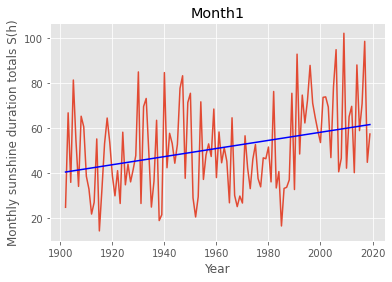

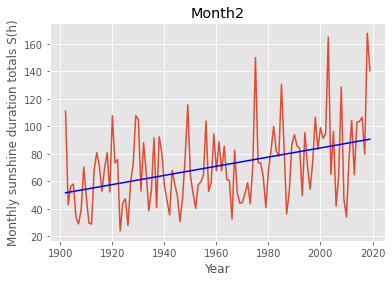

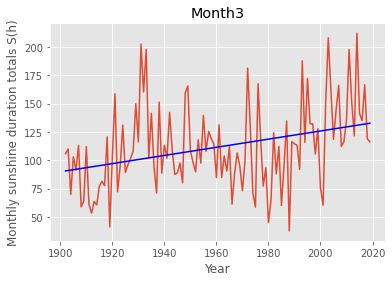

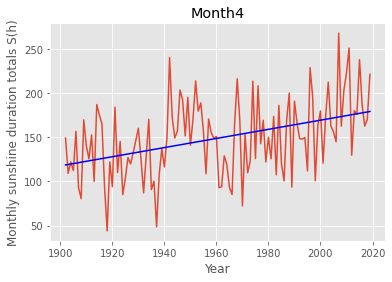

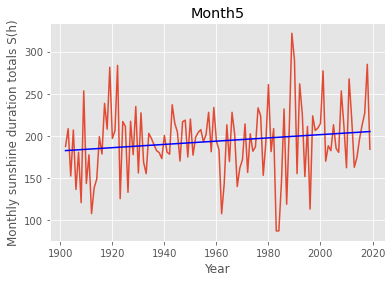

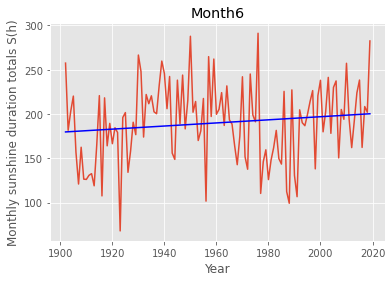

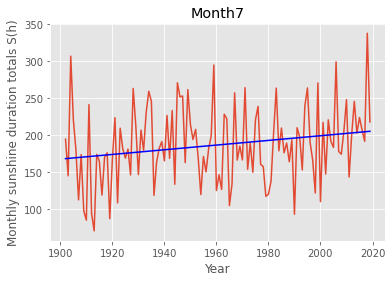

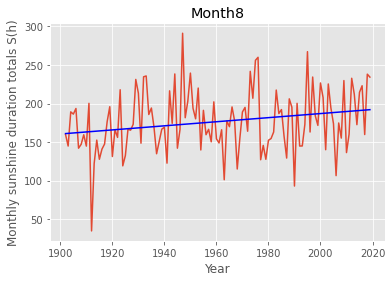

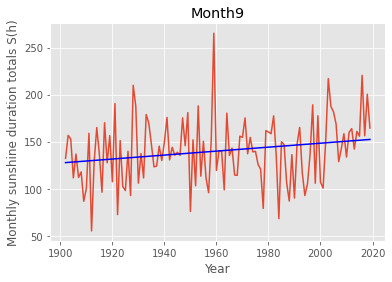

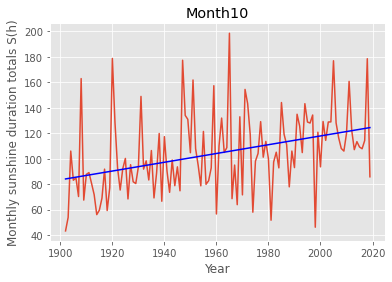

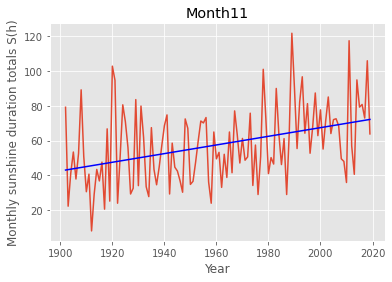

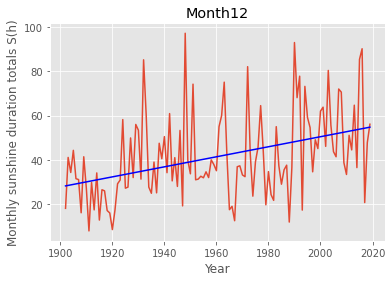

In [11]:
for i in range(12):
    
    plt.figure(figsize=(6, 4))
    #plt.style.use('ggplot')classic
    plt.style.use('ggplot')
    chart = sns.lineplot(x="Year", y=str(i+1)+"s", data=mdf, 
                      markers=True)
    chart.set(title='Month'+str(i+1), ylabel='Monthly sunshine duration totals S(h)', xlabel="Year")

    z = np.polyfit(mdf['Year'], mdf[str(i+1)+"s"], 1)
    p = np.poly1d(z)

    plt.plot(mdf['Year'], p(mdf['Year']), c="b", ls="-")
    plt.savefig(str(i+1)+"s.jpeg",bbox_inches="tight",pad_inches = 0,dpi=700)

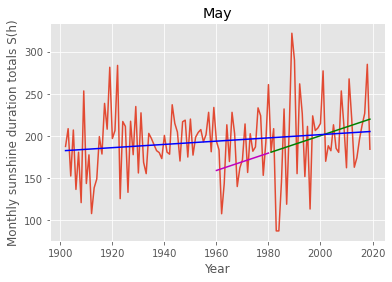

In [116]:
plt.figure(figsize=(6, 4))
    #plt.style.use('ggplot')classic
plt.style.use('ggplot')
chart = sns.lineplot(x="Year", y="5s", data=mdf, 
                      markers=True)
chart.set(title='May', ylabel='Monthly sunshine duration totals S(h)', xlabel="Year")

z = np.polyfit(mdf['Year'], mdf["5s"], 1)
p = np.poly1d(z)
zz = np.polyfit(mdf[mdf['Year']>1980]['Year'], mdf[mdf['Year']>1980]['5s'], 1)
pp = np.poly1d(zz)

zzz = np.polyfit(mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['Year'], mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['5s'], 1)
ppp = np.poly1d(zz)

plt.plot(mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['Year'], ppp(mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['Year']), c="m", ls="-")
plt.plot(mdf[mdf['Year']>1980]['Year'], pp(mdf[mdf['Year']>1980]['Year']), c="g", ls="-")
plt.plot(mdf['Year'], p(mdf['Year']), c="b", ls="-")
plt.savefig("5s.jpeg",bbox_inches="tight",pad_inches = 0,dpi=700)

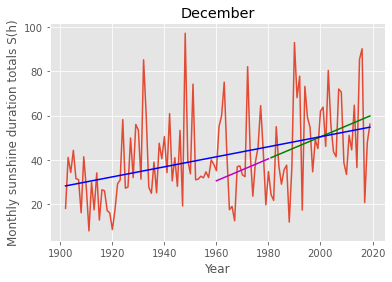

In [117]:
plt.figure(figsize=(6, 4))
    #plt.style.use('ggplot')classic
plt.style.use('ggplot')
chart = sns.lineplot(x="Year", y="12s", data=mdf, 
                      markers=True)
chart.set(title='December', ylabel='Monthly sunshine duration totals S(h)', xlabel="Year")


z = np.polyfit(mdf['Year'], mdf["12s"], 1)
p = np.poly1d(z)
zz = np.polyfit(mdf[mdf['Year']>1980]['Year'], mdf[mdf['Year']>1980]['12s'], 1)
pp = np.poly1d(zz)

zzz = np.polyfit(mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['Year'], mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['12s'], 1)
ppp = np.poly1d(zz)
p = np.poly1d(z)
plt.plot(mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['Year'], ppp(mdf[(mdf['Year']>1959)&(mdf['Year']<1981)]['Year']), c="m", ls="-")
plt.plot(mdf[mdf['Year']>1980]['Year'], pp(mdf[mdf['Year']>1980]['Year']), c="g", ls="-")
plt.plot(mdf['Year'], p(mdf['Year']), c="b", ls="-")
plt.savefig("12s.jpeg",bbox_inches="tight",pad_inches = 0,dpi=700)

In [118]:
mmdf=pd.DataFrame()
for i in range(12):
    mmdf[str(i+1)+"s"]=df[df['Month']==i+1].groupby('Year')['24-hour average temperature'].mean()
mmdf.reset_index(inplace=True)    

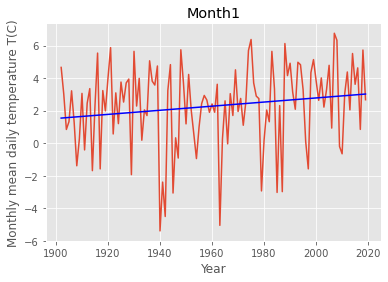

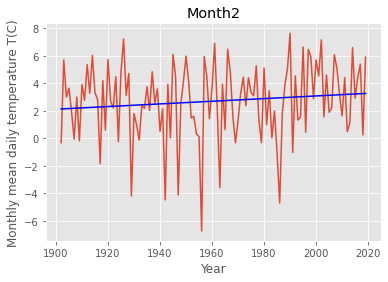

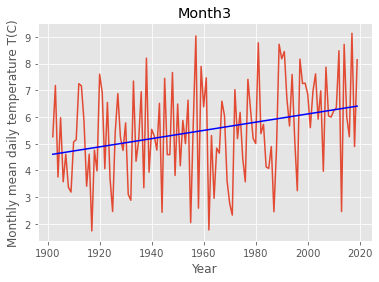

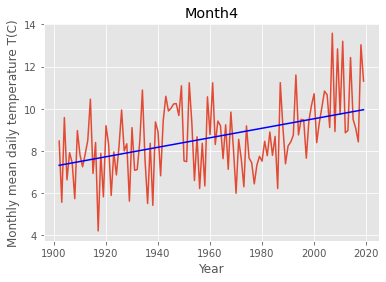

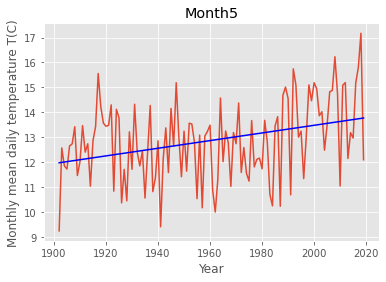

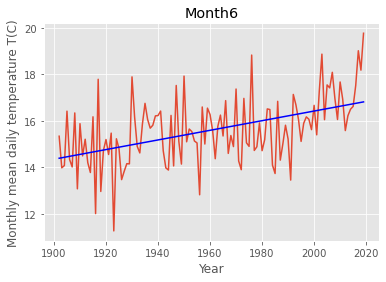

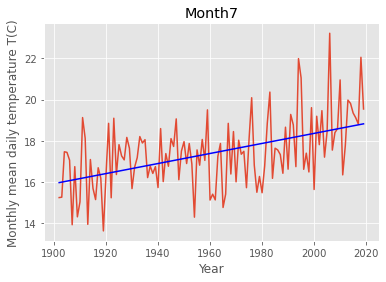

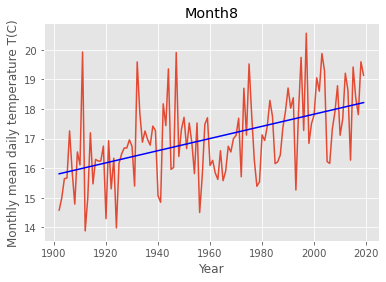

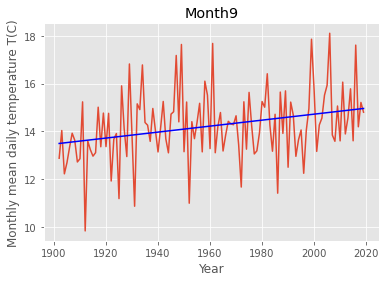

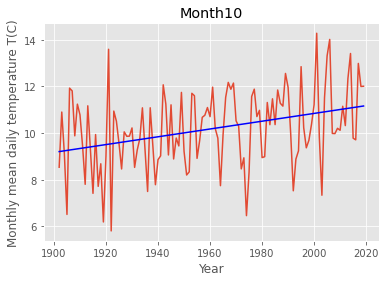

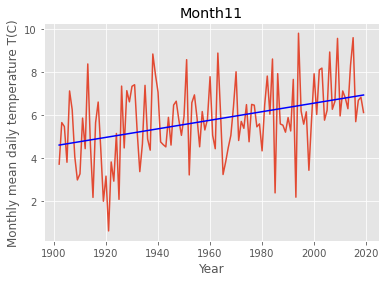

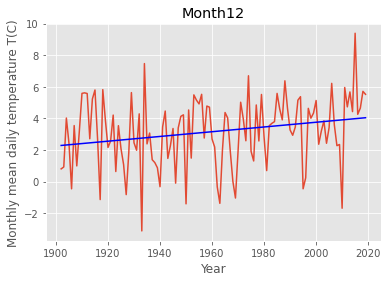

In [48]:
for i in range(12):
    
    plt.figure(figsize=(6, 4))
    #plt.style.use('ggplot')classic
    plt.style.use('ggplot')
    chart = sns.lineplot(x="Year", y=str(i+1)+"s", data=mmdf, 
                      markers=True)
    chart.set(title='Month'+str(i+1), ylabel='Monthly mean daily temperature T(C)', xlabel="Year")

    z = np.polyfit(mmdf['Year'], mmdf[str(i+1)+"s"], 1)
    p = np.poly1d(z)

    plt.plot(mmdf['Year'], p(mmdf['Year']), c="b", ls="-")
    plt.savefig(str(i+1)+"s.jpeg",bbox_inches="tight",pad_inches = 0,dpi=700)

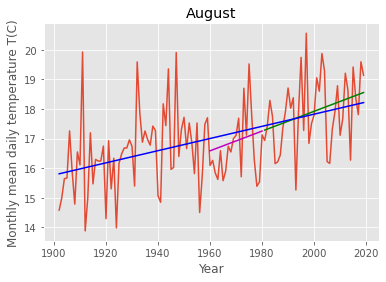

In [120]:
plt.figure(figsize=(6, 4))
    #plt.style.use('ggplot')classic
plt.style.use('ggplot')
chart = sns.lineplot(x="Year", y='8s', data=mmdf, 
                      markers=True)
chart.set(title='August', ylabel='Monthly mean daily temperature T(C)', xlabel="Year")

z = np.polyfit(mmdf['Year'], mmdf['8s'], 1)
p = np.poly1d(z)
zz = np.polyfit(mmdf[mmdf['Year']>1980]['Year'], mmdf[mmdf['Year']>1980]['8s'], 1)
pp = np.poly1d(zz)

zzz = np.polyfit(mmdf[(mmdf['Year']>1959)&(mmdf['Year']<1981)]['Year'], mmdf[(mmdf['Year']>1959)&(mmdf['Year']<1981)]['8s'], 1)
ppp = np.poly1d(zz)



plt.plot(mmdf[(mmdf['Year']>1959)&(mdf['Year']<1981)]['Year'], ppp(mmdf[(mmdf['Year']>1959)&(mmdf['Year']<1981)]['Year']), c="m", ls="-")
plt.plot(mmdf[mmdf['Year']>1980]['Year'], pp(mmdf[mmdf['Year']>1980]['Year']), c="g", ls="-")
plt.plot(mmdf['Year'], p(mmdf['Year']), c="b", ls="-")
plt.savefig('8t.jpeg',bbox_inches="tight",pad_inches = 0,dpi=700)

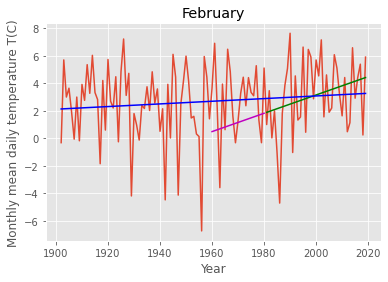

In [121]:
plt.figure(figsize=(6, 4))
    #plt.style.use('ggplot')classic
plt.style.use('ggplot')
chart = sns.lineplot(x="Year", y='2s', data=mmdf, 
                      markers=True)
chart.set(title='February', ylabel='Monthly mean daily temperature T(C)', xlabel="Year")

z = np.polyfit(mmdf['Year'], mmdf['2s'], 1)
p = np.poly1d(z)
zz = np.polyfit(mmdf[mmdf['Year']>1980]['Year'], mmdf[mmdf['Year']>1980]['2s'], 1)
pp = np.poly1d(zz)

zzz = np.polyfit(mmdf[(mmdf['Year']>1959)&(mmdf['Year']<1981)]['Year'], mmdf[(mmdf['Year']>1959)&(mmdf['Year']<1981)]['2s'], 1)
ppp = np.poly1d(zz)



plt.plot(mmdf[(mmdf['Year']>1959)&(mdf['Year']<1981)]['Year'], ppp(mmdf[(mmdf['Year']>1959)&(mmdf['Year']<1981)]['Year']), c="m", ls="-")
plt.plot(mmdf[mmdf['Year']>1980]['Year'], pp(mmdf[mmdf['Year']>1980]['Year']), c="g", ls="-")
plt.plot(mmdf['Year'], p(mmdf['Year']), c="b", ls="-")
plt.savefig('2t.jpeg',bbox_inches="tight",pad_inches = 0,dpi=700)